In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Import Libraries
from tensorflow.keras.preprocessing.image import load_img
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_dir='/content/drive/MyDrive/Segmented Medicinal Leaf Images/Train Data'
test_dir='/content/drive/MyDrive/Segmented Medicinal Leaf Images/Test Data'

In [4]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [5]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir) # For testing i took only few samples from unseen data. we can evaluate using validation data which is part of train data.
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

18 Classes
614 Train images
435 Test images


In [6]:
# Preprocessing data.
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, # validation split 20%.
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [7]:
# set height and width and color of input image.
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True, target_size=(img_width,img_height), batch_size=batch_size)

Found 614 images belonging to 18 classes.
Found 435 images belonging to 12 classes.


In [8]:
train_generator.class_indices

{'Alpinia Galanga (Rasna)': 0,
 'Amaranthus Viridis (Arive-Dantu)': 1,
 'Azadirachta Indica (Neem)': 2,
 'Basella Alba (Basale)': 3,
 'Carissa Carandas (Karanda)': 4,
 'Ficus Auriculata (Roxburgh fig)': 5,
 'Hibiscus Rosa-sinensis': 6,
 'Jasminum (Jasmine)': 7,
 'Mangifera Indica (Mango)': 8,
 'Mentha (Mint)': 9,
 'Murraya Koenigii (Curry)': 10,
 'Nerium Oleander (Oleander)': 11,
 'Nyctanthes Arbor-tristis (Parijata)': 12,
 'Ocimum Tenuiflorum (Tulsi)': 13,
 'Piper Betle (Betel)': 14,
 'Plectranthus Amboinicus (Mexican Mint)': 15,
 'Punica Granatum (Pomegranate)': 16,
 'Santalum Album (Sandalwood)': 17}

In [9]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 84, 84, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 41, 41, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 19, 19, 64)        0

In [11]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2']


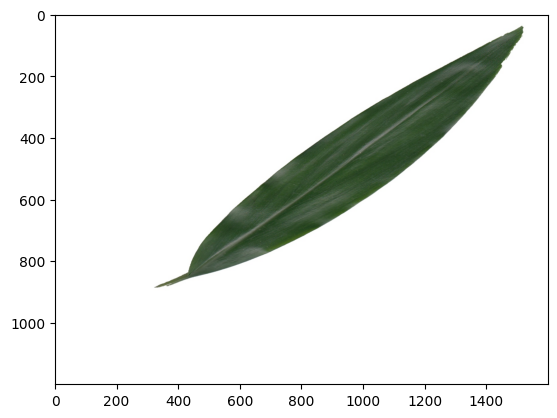

In [12]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

img1 = load_img('/content/drive/MyDrive/Segmented Medicinal Leaf Images/Train Data/Alpinia Galanga (Rasna)/AG-S-001.jpg')
plt.imshow(img1)

# Preprocess image
img1 = load_img(
    '/content/drive/MyDrive/Segmented Medicinal Leaf Images/Train Data/Alpinia Galanga (Rasna)/AG-S-001.jpg', target_size=(256, 256))
img = img_to_array(img1)
img = img / 255
img = np.expand_dims(img, axis=0)

In [13]:
# Visualizing output after every layer.
from keras.models import Model
conv2d_1_output = Model(inputs=model.input, outputs=model.get_layer('conv2d').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d').output)
conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_1').output)
max_pooling2d_2_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)
conv2d_3_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
max_pooling2d_3_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)
flatten_1_output = Model(inputs=model.input,outputs=model.get_layer('flatten').output)
conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
conv2d_3_features = conv2d_3_output.predict(img)
max_pooling2d_3_features = max_pooling2d_3_output.predict(img)
flatten_1_features = flatten_1_output.predict(img)

1/1 [==============================] - 0s 144ms/step


1/1 [==============================] - 0s 178ms/step


1/1 [==============================] - 0s 60ms/step


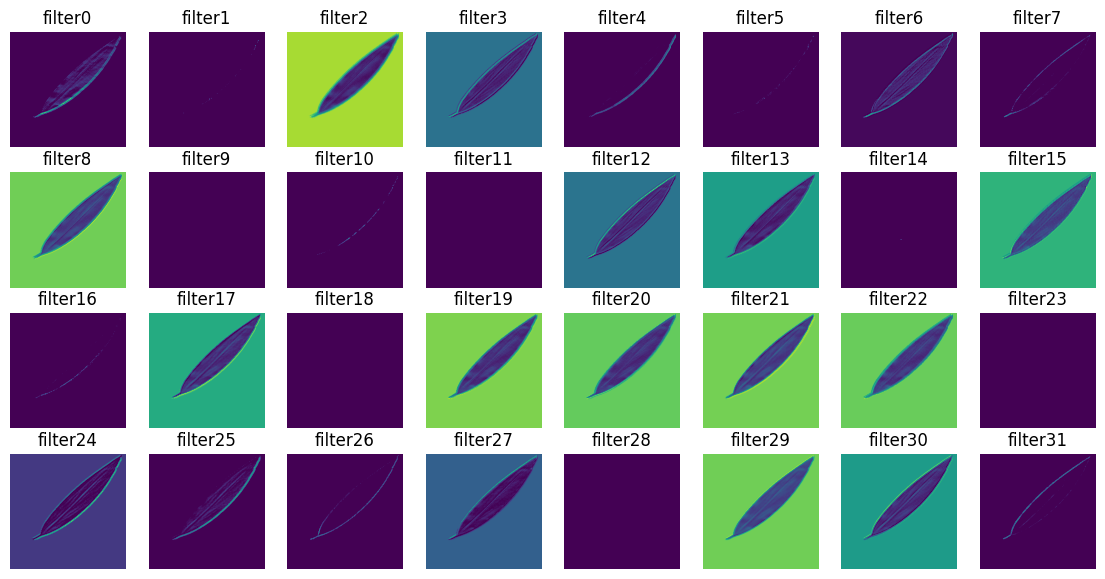

In [14]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis') # Visualizing in color mode.
plt.show()

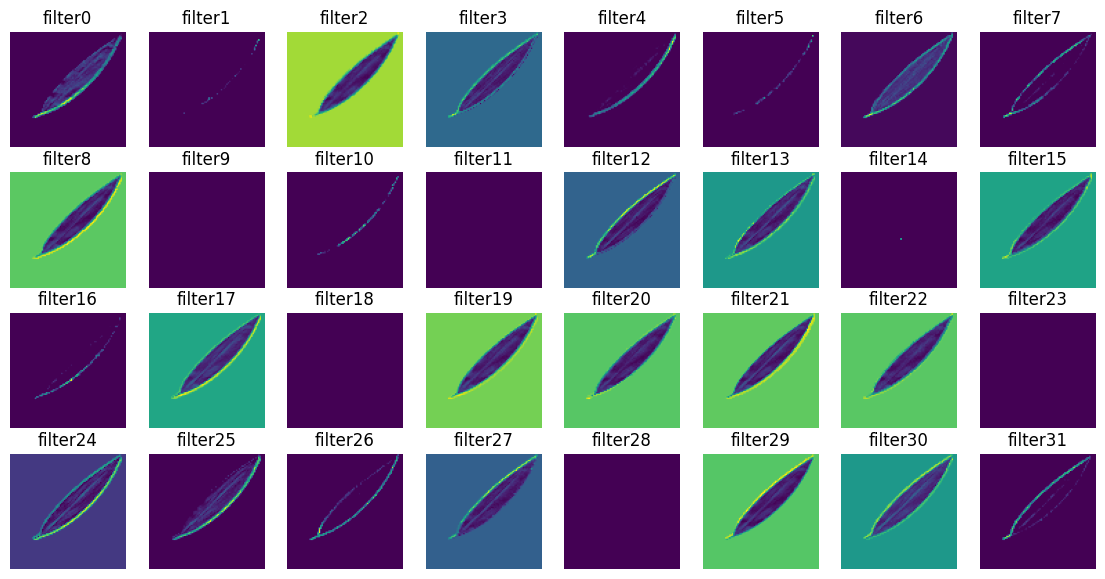

In [15]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

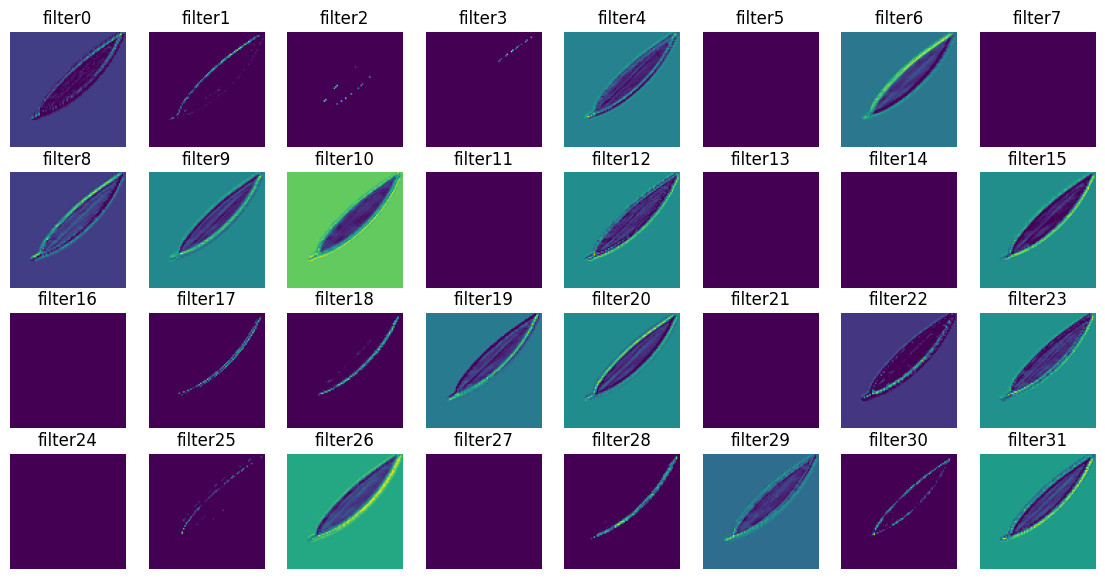

In [16]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

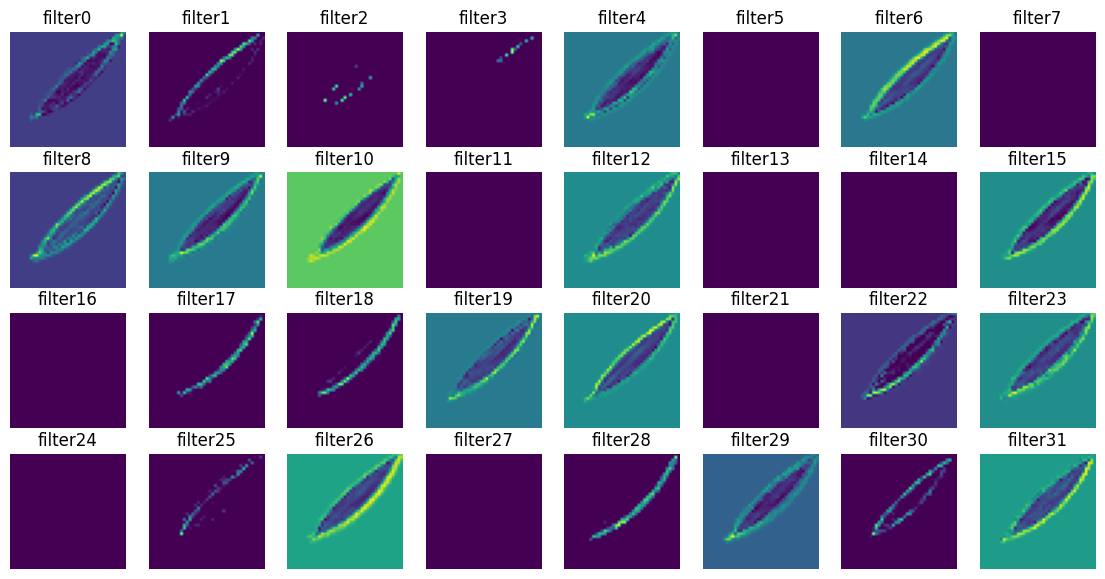

In [17]:
# we can also visualize in color mode.
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

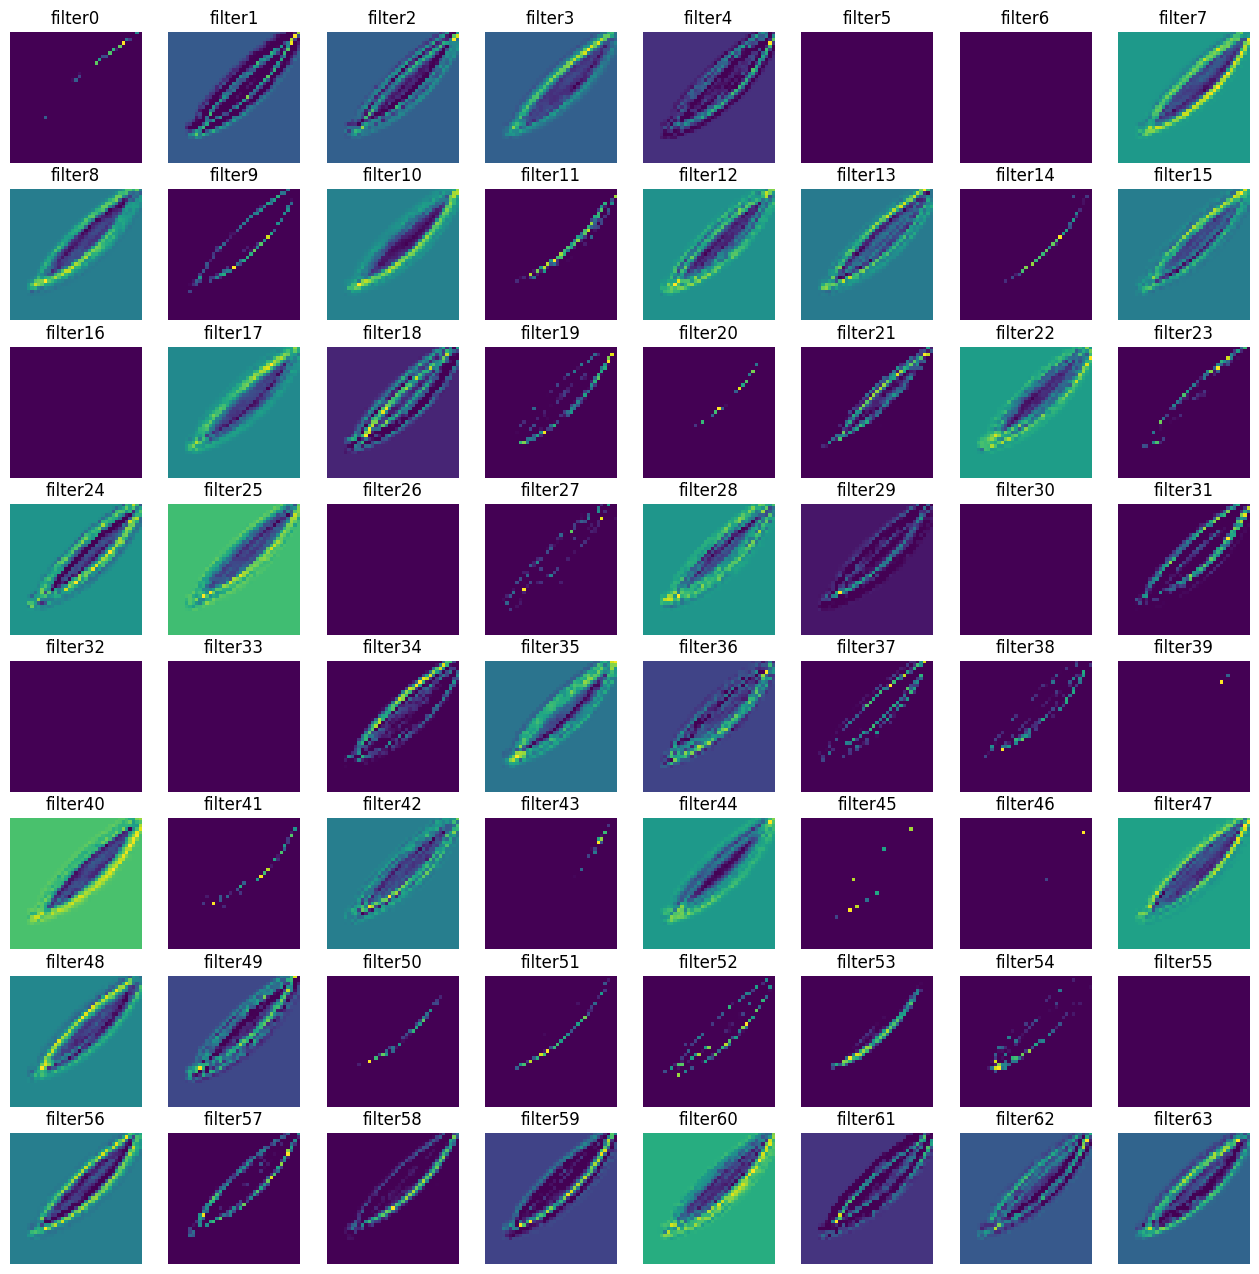

In [18]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(16,16))
columns =8
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_3_features[0, :, :, i], cmap='viridis')
plt.show()

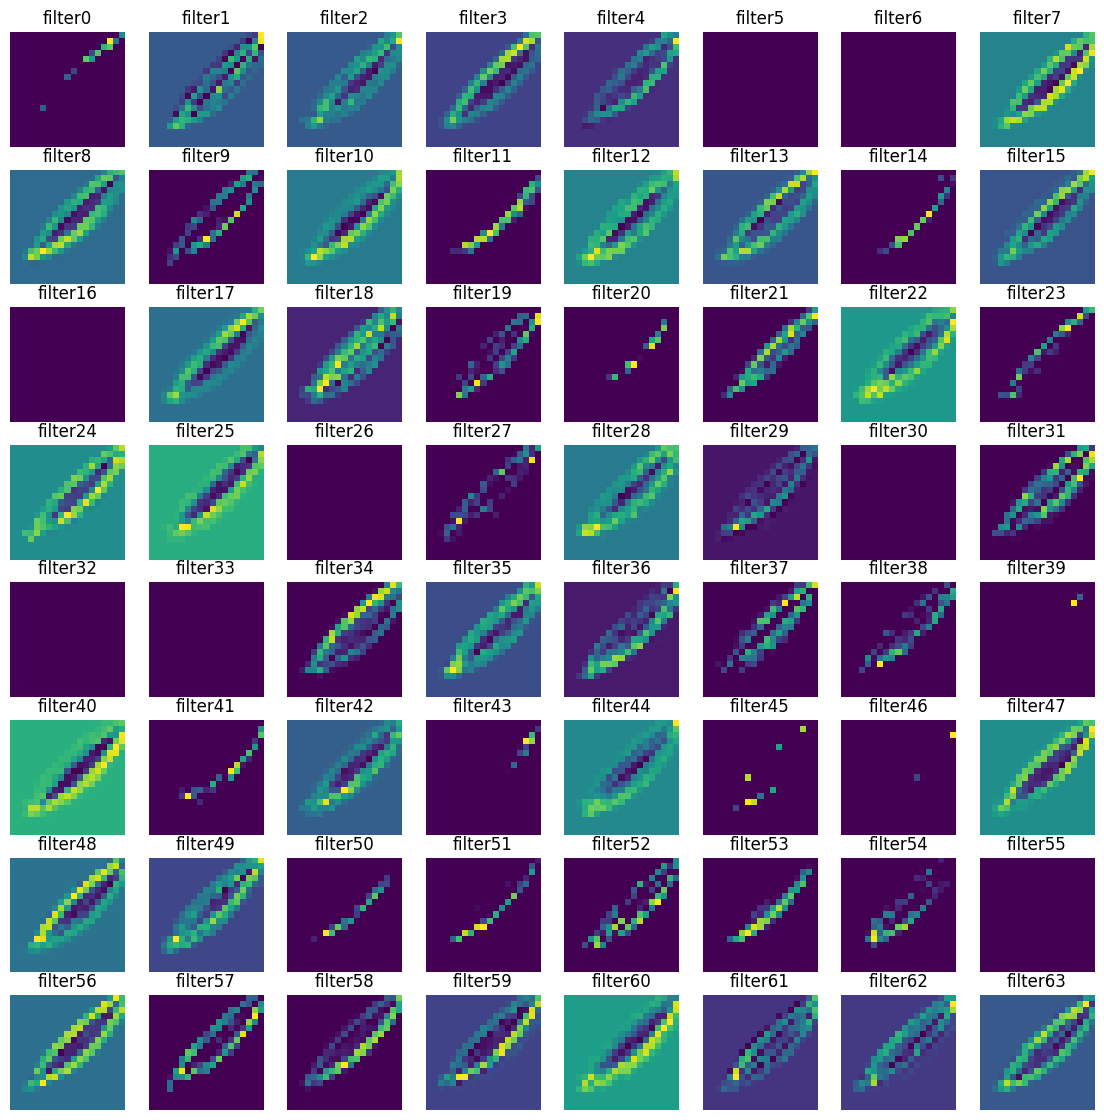

In [19]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,14))
columns = 8
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_3_features[0, :, :, i],cmap='viridis')
plt.show()

In [20]:
# validation data.
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size)

Found 614 images belonging to 18 classes.


In [21]:
opt = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy',
              metrics=['accuracy'])
train = model.fit_generator(train_generator,
                            epochs=75,
                            steps_per_epoch=train_generator.samples // batch_size,
                            validation_data=validation_generator,
                            validation_steps=validation_generator.samples // batch_size,
                            verbose=1)

Epoch 1/75
19/19 [==============================] - 279s 14s/step - loss: 2.8896 - accuracy: 0.0808 - val_loss: 2.7947 - val_accuracy: 0.1151
Epoch 2/75
19/19 [==============================] - 35s 2s/step - loss: 2.7301 - accuracy: 0.1289 - val_loss: 2.4791 - val_accuracy: 0.1595
Epoch 3/75
19/19 [==============================] - 35s 2s/step - loss: 2.5642 - accuracy: 0.1409 - val_loss: 2.3232 - val_accuracy: 0.2138
Epoch 4/75
19/19 [==============================] - 29s 2s/step - loss: 2.3971 - accuracy: 0.1924 - val_loss: 2.1993 - val_accuracy: 0.2615
Epoch 5/75
19/19 [==============================] - 35s 2s/step - loss: 2.2503 - accuracy: 0.2354 - val_loss: 2.1142 - val_accuracy: 0.3191
Epoch 6/75
19/19 [==============================] - 35s 2s/step - loss: 2.1987 - accuracy: 0.2732 - val_loss: 2.0481 - val_accuracy: 0.3651
Epoch 7/75
19/19 [==============================] - 35s 2s/step - loss: 2.1230 - accuracy: 0.2869 - val_loss: 1.9698 - val_accuracy: 0.2944
Epoch 8/75
19/19 [

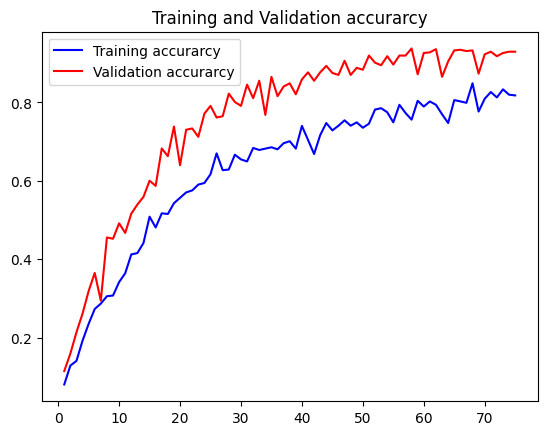

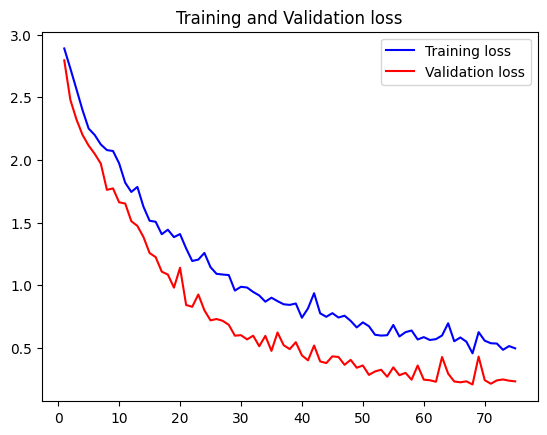

In [22]:
acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [23]:
# Save entire model with optimizer, architecture, weights and training configuration.
from keras.models import load_model
model.save('leaf.h5')

In [24]:
# Save model weights.
from keras.models import load_model
model.save_weights('leaf_weights.h5')

In [25]:
# Get classes of model trained on
classes = train_generator.class_indices
classes

{'Alpinia Galanga (Rasna)': 0,
 'Amaranthus Viridis (Arive-Dantu)': 1,
 'Azadirachta Indica (Neem)': 2,
 'Basella Alba (Basale)': 3,
 'Carissa Carandas (Karanda)': 4,
 'Ficus Auriculata (Roxburgh fig)': 5,
 'Hibiscus Rosa-sinensis': 6,
 'Jasminum (Jasmine)': 7,
 'Mangifera Indica (Mango)': 8,
 'Mentha (Mint)': 9,
 'Murraya Koenigii (Curry)': 10,
 'Nerium Oleander (Oleander)': 11,
 'Nyctanthes Arbor-tristis (Parijata)': 12,
 'Ocimum Tenuiflorum (Tulsi)': 13,
 'Piper Betle (Betel)': 14,
 'Plectranthus Amboinicus (Mexican Mint)': 15,
 'Punica Granatum (Pomegranate)': 16,
 'Santalum Album (Sandalwood)': 17}

In [26]:
# Loading model and predict.
from keras.models import load_model
model=load_model('leaf.h5')

Classes = ['Alpinia Galanga (Rasna)',
 'Amaranthus Viridis (Arive-Dantu)',
 'Azadirachta Indica (Neem)',
 'Basella Alba (Basale)',
 'Carissa Carandas (Karanda)',
 'Ficus Auriculata (Roxburgh fig)',
 'Hibiscus Rosa-sinensis',
 'Jasminum (Jasmine)',
 'Mangifera Indica (Mango)',
 'Mentha (Mint)',
 'Murraya Koenigii (Curry)',
 'Nerium Oleander (Oleander)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Piper Betle (Betel)',
 'Plectranthus Amboinicus (Mexican Mint)',
 'Punica Granatum (Pomegranate)',
 'Santalum Album (Sandalwood)']

1/1 [==============================] - 0s 117ms/step
Santalum Album (Sandalwood)


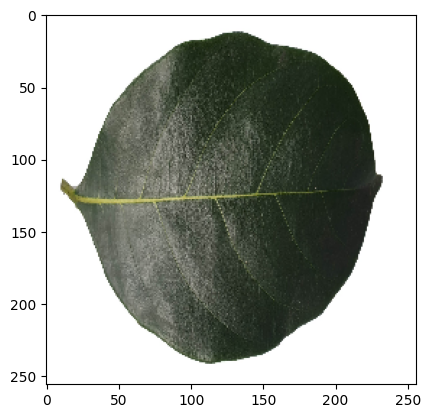

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Pre-Processing test data same as train data.
img_width = 256
img_height = 256


def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x / 255
    return np.expand_dims(x, axis=0)


result = model.predict(
    [prepare("/content/drive/MyDrive/Segmented Medicinal Leaf Images/Test Data/Artocarpus Heterophyllus (Jackfruit)/AH-S-001.jpg")])
predicted_class = np.argmax(result)
disease = image.load_img(
    "/content/drive/MyDrive/Segmented Medicinal Leaf Images/Test Data/Artocarpus Heterophyllus (Jackfruit)/AH-S-001.jpg", target_size=(256, 256))
plt.imshow(disease)
print(Classes[predicted_class])

In [28]:
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model('leaf.h5')

# Convert the Keras model to a TFLite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
open("output.tflite", "wb").write(tflite_model)

6050792